
## COSC2671 Social Media and Network Analytics
### Assignment 1
### @author Phil Steinke, 2019
### Student s3725547

In [20]:
import warnings
import os
import pdb
import pandas as pd

# from src.config.constants import Constants
# os.chdir(Constants.path)
PATH = '/Users/phil/code/data-science-next/uni/social-media/ass01_charity_ml_scraping_social_media'
os.chdir(PATH)

!jt -t grade3
warnings.filterwarnings('ignore')

# python scripts
from src.models import *
from src.data import *
from src.data.api import *
from src.visualization import *
from src.features import *
from src.preprocessing import *  # convert_csv_to_json
from src.common.util import *



## Introduction

**Describe what/who is your selected entity**

I'm searching for sentiment analysis about the topic `Charity` on Twitter

**Describe why it is interesting to find the sentiment and topics(answer questions) of this entity**

A: Given the heart foundations recent [controversy](https://www.abc.net.au/news/2019-05-31/heart-foundation-apologises-for-heartless-words-ad-campaign/11167870) I became interested in how people feel about charities. 
Eg. Are people generally positive about charity? Or do they have 'compassion fatigue'? Can organisations like the Heart foundation justify shocking people into doing what they want?

*please-note: All code chunks are available at[github/tgrrr/data-science](https://github.com/tgrrr/data-science/tree/social-media-assignment1/uni/social-media/assignment01)*



## 0. Data Collection

### Describe how you collected the data, and briefly why you chose that approach(restful vs stream)*

- Data was scraped via REST interface via Tweepy API
- I initially scrapped the data into a `csv`, then a `json` with the format:

```
[{tweet1}, {tweet2}, {tweet3}]
```

I then discovered that the code was well written, however I had confused the output as json, when it was actually a lines of `dictionaries`:

```
{tweet1}
{tweet2}
{tweet3}
```

- This means that I have rewritten some of the code to work for json, rather than dictionaries
- Filenames for data using the dictionaries is denoted with `-multi-json`




Initially, we searched for multiple terms with the search term:

```
"charity" (data OR science OR artificial OR intelligence OR machine OR learning OR ai OR ml)
```

However, searching for multiple results on Twitter returned only a handful of
results with Tweepy, compared to the twitter website


In [2]:
# params:
start_date = '2018-08-01'
search_term = '"charity"%20(machintodo1e%20OR%20learning%20OR%20artificial%20OR%20intelligence)%20(%23ml%20OR%20%23ai)'
fetchTweets(search_term, start_date)


Fetch Tweets
And... donesky



The dataset is not big enough, so we can refine our scrape to charity:


In [3]:
search_term = 'charity'
# please note: only run this once, it's an expensive function
# fetchTweets(search_term, start_date)



## 1. Data Pre-processing and Data Cleaning

### What obstacles do we need to overcome?

- **Obstacle:** Twitter text is trunicated
- **Solution:** wrote function `handle_fulltext_twitter_json_loc(tweet)` to deal
with getting full text from tweets. Because `full_text` is present in a
different location in the json for retweets and regular tweets
see: http: // docs.tweepy.org/en/latest/extended_tweets.html  # examples

Also note that I filtered the returned tweets to only include the:
- `tweet`
- `date`
- `userId`

- TODO:  Plot some graphs, etc to show why you decided to do those pre-processing



**Convert CSV to json**

Initially I scraped into a `csv`, so this code converts it into json format:


In [4]:

colnames = ['full_text', 'date', 'id']
convert_csv_to_json('data/raw/charity_tweets_11110', colnames)


Convert csv to json



#### About the data

- TODO: Report some statistics of your collected data
- [x] A few thousand tweets per week in your data.
> 11110 tweets collected



#### Show examples of noisy data

##### Sample tweet:

Lets grab a sample tweet. From the scraper we get:

> `'b"don\'t use just #artificialintelligence for the sake of it. #AI needs to solve a problem - @somenmondal @ideal What kind of problems could #AI solve in your #charity? https://t.co/BaO22oyQDW"'`

After conversion, we would like:

> `don't use just artificialintelligence for the sake of it. AI needs to solve a problem - What kind of problems could AI solve in your charity?`

#### Describe what pre-processing you performed

- Each of the tweets when we get the full_text tweet starts with `b'`

Initially, this appears as byte data, however, it's actually a string
-  Special characters are \\xf0\\x9f\\xa4\\x96, etc and escaped
-  Remove links
-  Remove @usernames
-  Remove  # hashtags



### Decode utf8

Why do we need to decode it again to utf8?

If we sample a part of our encoded text:


In [5]:
encoded_sample = b'didn\xe2\x80\x99t'
type(encoded_sample)  # bytes
# however, the output is `didn't`:
b'didn\xe2\x80\x99t'.decode('utf-8')  
# So reformatting it to utf-8 works


'didn’t'


- [x] Are there characters that aren't useful for analysis?
Yes, so we will provide functions to remove 
@username, #hashtags, links, underscores, and escaped char


In [24]:

fJsonName = 'data/raw/charity_tweets_sample_100.json'
out = 'data/processed/data_sample.json'
# strip_tweet(fJsonName, out)

In [9]:

# please note: This is an expensive process, so run it in terminal using
# `python preproccessing/stripTweetsTerminal.py`
fJsonName = 'data/raw/charity_tweets_11110.json'
out = 'data/processed/data.json'
# strip_tweet(fJsonName, out)


### Demo stripping:

Samples of before and after stripped tweets:

full_text: "b'#\\xe0\\xa4\\xaa\\xe0\\xa5\\x82\\xe0\\xa4\\xb0\\xe0\\xa5\\x8d\\xe0\\xa4\\xa3\\xe0\\xa4\\x97\\xe0\\xa5\\x81\\xe0\\xa4\\xb0\\xe0\\xa5\\x81_\\xe0\\xa4\\xb8\\xe0\\xa4\\x82\\xe0\\xa4\\xa4\\xe0\\xa4\\xb0\\xe0\\xa4\\xbe\\xe0\\xa4\\xae\\xe0\\xa4\\xaa\\xe0\\xa4\\xbe\\xe0\\xa4\\xb2\\xe0\\xa4\\x9c\\xe0\\xa5\\x80\\nKabir, Guru without turning garland, Guru without giving charity.\\n Guru bin is both fruitless, ask whether the Beda Purana.\\n Guru bin Naam revokes or donates a garland of 
chanting, that is in vain.  This is also evident in the Vedas and Puranas. https://t.co/SACS9EGRGU'"

full_text_stripped: "Kabir Guru without turning garland Guru without giving charity Guru bin is both fruitless ask whether the Beda Purana Guru bin Naam revokes or donates a garland of chanting that is in vain This is also evident in the Vedas and Puranas"

full_text: "b'Summer Sweep Sale! 20% Off Store Wide!!\\nTammysTreasures554 -Ebay - 10% Of All Sales Go To Charity \\nhttps://t.co/x5zLCBtjxC https://t.co/j2kzcgNDrU'"

full_text_stripped: "Summer Sweep Sale 20 Off Store Wide TammysTreasures554 Ebay 10 Of All Sales Go To Charity"

full_text: "b'May God bless them kids that these niggas be lien on cus they don\\xe2\\x80\\x99t deserve all that \\xf0\\x9f\\xa5\\xba'"

full_text_stripped: "May God bless them kids that these niggas be lien on cus they don\u2019t deserve all that \ud83e\udd7a"

full_text: "b'Audrey Hepburn at the charity ball Les Petits Lits Blancs aboard the liner France in Le Havre, France, January 14, 1962. #audreyhepburn https://t.co/njgOruCOSd'"

full_text_stripped: "Audrey Hepburn at the charity ball Les Petits Lits Blancs aboard the liner France in Le Havre France January 14 1962"

full_text: "b\"Through their 'Integrity Initiative' project, the Institute for Statecraft \\xe2\\x88\\x92 a state-funded charity \\xe2\\x88\\x92 conducted a number of shady activities, like smearing Jeremy Corbyn.\\n\\nThis requires a public inquiry. Watch what happened when I visited their London office earlier this year. https://t.co/42LOIhFcDO\""

full_text_stripped: "Through their Integrity Initiative project the Institute for Statecraft \u2212 a state funded charity \u2212 conducted a number of shady activities like smearing Jeremy Corbyn This requires a public inquiry Watch what happened when I visited their London office earlier this year"

full_text: "b'Sunday morning looks sunny - so why not join this fundraising family walk? It is a way to help raise funds for the Park along with a second charity chosen by the organisers. You will find all details online https://t.co/9fAo10AEpg'"

full_text_stripped: "Sunday morning looks sunny so why not join this fundraising family walk It is a way to help raise funds for the Park along with a second charity chosen by the organisers You will find all details online"

full_text: "b'Cheating at a charity golf day. Yay or nay? \\n@mattricho0\\n@NathanBrown_07\\n\\nListen to Richo, Browny &amp; Hummer here  -  https://t.co/yI4xyEKPYC https://t.co/Oo9zflwHId'"

full_text_stripped: "Cheating at a charity golf day Yay or nay Listen to Richo Browny amp Hummer here"

full_text: "b\"2 days to go! 10 of the Broadsword team will be running 10km in Hyde Park on Sunday for Mind, the mental health charity. If you haven't already, you can donate by following this link https://t.co/yqMeBjEOwz #10k #goteambroadsword\""

full_text_stripped: "2 days to go 10 of the Broadsword team will be running 10km in Hyde Park on Sunday for Mind the mental health charity If you haven t already you can donate by following this link"



Note for future analysis:

- It would be great to analyse emojis for sentiment analaysis, so I have left them in
- In future, it would be great to separate out additional text and remove duplicate text in retweets



### 1.2 Initial Exploration (Pre-processing)

#### top K unique hashtags


In [10]:
fName = 'data/raw/with-hashtags/data-array-with-hashtags.txt'
doGetHashtags(fName, 50)
# BUG: doGetMentions('data/processed/data.json', 30)


charity: 15767
2029: 3759
zevent2019: 3089
win: 2803
winner: 2621
prize: 2621
ipadair: 2609
news: 2197
jimin: 1975
tlt9495: 1839
v: 1836
jhope: 1835
rm: 1834
fundraising: 1787
greenleaf: 1423
macmillancoffeemorning: 1346
maguire: 812
donate: 790
nonprofit: 711
community: 644
support: 613
givingbackwithlouve: 610
volunteer: 567
charitytuesday: 549
coffeemorning: 482
bts: 460
mentalhealth: 405
fundraiser: 404
jamalkhashoggi: 383
kaappaan: 379
bloomberggbf: 367
rt: 362
yemencantwait: 357
khashoggi: 356
standwithkashmir: 354
cancer: 353
freeloujain: 353
freekashmir: 351
dictatordollars: 350
homeless: 330
love: 321
macmillan: 319
education: 319
cake: 299
twitch: 294
donation: 290
thestandardofheaven: 290
philanthropy: 289
fridayfeeling: 289
music: 282


- Please note that while I was able to scrape the hashtags and mentions,
there is a continuing bug in this code which means I have not been able to
display the `mentions`



Top K unique words


In [11]:
# expensive process:
# doProcessTweet('data/processed/data.json',           
               # 'full_text_stripped', 30, isJson=True)


In [12]:
lTweets_sample = load_tweets_list('data/processed/data_sample.json')
lTweets = load_tweets_list('data/processed/data.json')



Average tweet length without mentions, hashtags, or links:


In [13]:
#
lengths_lTweets = [len(i) for i in lTweets]
sum(lengths_lTweets) / float(len(lengths_lTweets))


156.46979926185975


## 2. Analysis Methodology




- what are the topics been discussed about a user via a top-K terms

FIXME: after MD
- charities: 8703
- this: 1902
- raise: 1803
- donate: 1769
- money: 1440
- ha: 1390
- help: 1309
- support: 1253
- world: 1221
- hi: 1121
- amp: 969
- ever: 938
- wa: 897
- watch: 852
- create: 815
- people: 797
- day: 788
- clean: 768
- porn: 758
- ocean: 748
- dirtiest: 744
- thanks: 707
- work: 701
- us: 691
- get: 686
- go: 663
- one: 654
- year: 651
- please: 631



### Topic Analysis - what are the topics?


Topic 0:
charity summer come day help prizes don amp event thanks kids great asked
Topic 1:
come great prizes don event charity summer amp asked kids day help thanks
Topic 2:
charity kids summer amp come day asked thanks help prizes don event great
Topic 3:
great event charity amp asked thanks don kids day come summer help prizes
Topic 4:
summer charity thanks great come day asked amp don prizes help event kids
Topic 5:
charity amp day event asked come prizes help kids great don thanks summer
Topic 6:
event day kids amp come help summer prizes thanks asked great charity don
Topic 7:
prizes charity amp event day come thanks don summer asked help great kids
Topic 8:
kids don charity asked event thanks help prizes come amp great summer day
Topic 9:
thanks help asked great prizes don event charity kids day summer come amp


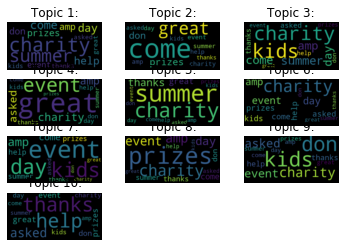

In [14]:
doDisplayWordcloud(lTweets_sample)


Topic 0:
charity time today money make raising great people free love years day big think look
Topic 1:
charity year proceeds match new going final organisations 16 hate dedicated golf amazing held million
Topic 2:
charity work help amp support team health tomorrow week funds tickets join donate just care
Topic 3:
charity president donate project help 000 let donating 10 campaign uk trump support salary rich
Topic 4:
porn charity money raise world watch created clean dirtiest oceans challenge online school organisation actually
Topic 5:
giving guru kids bin ask charity garland donates patients naam kabir vain revokes purana chanting
Topic 6:
charity like good thank doing need just fantastic month shop ve end people luck yes
Topic 7:
home follow charity cancer begins doesn girl shouldn malls coz restaurants want saturday donated link
Topic 8:
charity amp day children god support event heart local fun does government jesus run annual
Topic 9:
charity raised donations did world tour milli

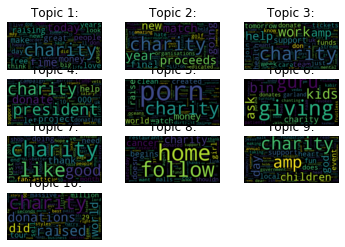

In [15]:
doDisplayWordcloud(lTweets)


##### Topic Analysis Word Cloud

- **Topic 0:** charity new today work amp support event help local great helping looking need challenge charities
- **Topic 1:** like shop charity good month people luck yes life fantastic time 50 thank end receive
- **Topic 2:** charity match proceeds funds final organisations 16 hate million dedicated held alongside stadium distributed combatting
- **Topic 3:** charity amp donate amazing just year don ve make people going uk time aid great
- **Topic 4:** president charity donating 10 000 donate project help campaign let trump salary rich known vets
- **Topic 5:** charity raised donations world did million tour sell massive 29 harry 90 seconds styles years
- **Topic 6:** cancer charity want people support thank help link use saturday research way thanks august donated
- **Topic 7:** charity day september raising love team 2019 golf health community amp does know days family
- **Topic 8:** porn charity money raise world watch created clean dirtiest oceans home follow begins doesn girl
- **Topic 9:** charity money god heart like government taking jesus think doing amp head isn shops good



#### Sentiment Analysis - Count


panjab, floods, womens, hygiene, sanitary, items, team, providing, \+support, women, flooded, areas, panjab, floods, donation, link, : 1
superstar, athlete, hope, 👏, 👏, : 0
also, auto, convert, hyperlink, charity, “, facebook, fundraiser, ”, format, asked, donations, instead, flowers, dad, popped, think, lot, keeping, people, facebook, opposed, hopping, across, web, \-losing, ad, revenue, : -1
’, heard, already, ’, \+amazing, charity, amp, event, happening, november, \+benefit, alzheimer, ’, research, proceeds, going, \+amazing, lineup, sponsors, prizes, \+available, going, \+incredible, check, : 5
\+great, coverage, \+helping, hands, summer, programme, today, ’, evening, news, \+solidarity, charity, ✊, ️, thanks, screenshots, 👏, : 3
\+good, though, would, add, conservatism, \+free, markets, voluntary, charity, \-mistake, argue, : 1
announcement, \+pleased, announce, us, congressman, give, opening, remarks, 5th, annual, knoxville, fitness, challenge, \+healthy, living, charity, event, 

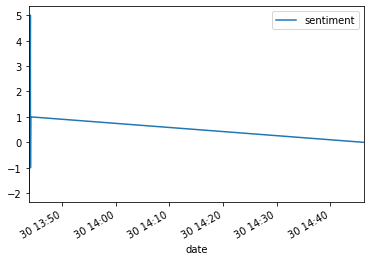

In [17]:
doSentimentAnalysis('data/processed/data_sample-multi-json.json', approach='count')





#### Sentiment Analysis - Vader



neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 


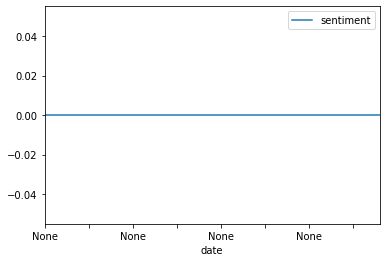

In [18]:
# Given more time I would explore this bug:
doSentimentAnalysis('data/processed/data_sample-multi-json.json', approach='vader')


*Fig1. Hourly sentiment analysis of the term Charity*
![image](../reports/figures/charity_sentiment_analysis_timeseries_count.png)

- There is no clear trend. It would be good to do time-series analysis on this data
I ran it for both sentiment analysis with vader and count
I adjusted the parameters could be adjusted for daily, hourly, weekly. However, the topic has no clear time-series trend, ACF, etc.
- We would need a much longer sample of data to detect sentiment over seasonality. Eg. Are people more positive about charity near Christmas?

### Does the approach selected have parameters

Yes. It takes a dictionary of words for positive or negative sentiment
- It would be good to increase the dictionary of terms available for positive and negative sentiment



 ## Conclusion
 
 Provide a short conclusion about your entity, analysis and what you found
 ### Goals:

 - [x] What are the trending concepts and topics associated with this person or event?
 - [x] What are the perceptions and feelings towards this person or event?
 - [x] Get Twitter data
 - [x] Do market research
 
 ### Discussion of results (Discussion)
 
 #### Describe your data

 The scraped tweets have a wide range of sentiment:
 - Some positive, promoting raising money for charity
 - Some negative, about controversy happening with charity
 - Or because of problems happening in the world, which need to be addressed

 - Outline and describe your approach, your findings and insights to the questions
 
 **Does it correspond to recent news**
 
 Yes, please see notes in introduction about Heart Foundation
 
## Would a different approach produce different answer?
 A: Yes. Given _more_ time I would have a look at combinations of two
 or multiple word groups of sentences

 **Other sources of information**
 
 - See comments about Red Cross above
 - It would be good to examine other data sources
 
 **If the results don’t correspond to background knowledge, why you think that is so?**
 
 It does correspond to my background knowledge and understanding of the subject
 
##### Future Analysis
 
 - If I expanded on this report, it would be good to find and separate our retweet text. In some cases, the retweet may include a comment which we can analyse the sentiment of.
 - In other cases, it would simply be a retweet, which has effected the topic and sentiment analysis
 
##### Explain what the results indicate (Discussion)
 
The results indicate that there are positive and negative trends. This warrants more exploration.



### Embed Sample of the Data (1st 1000 tweets)

[CSV sample of first 1000 tweets](https://github.com/tgrrr/data-science/blob/assignment % 2Fmachine-learning-ass1/uni/social-media/assignment_1/charity_ml_scraping_social_media/data/raw/charity_tweets_sample_1000.csv)
[List of Dictionary sample of first 1000 tweets](https://github.com/tgrrr/data-science/blob/assignment % 2Fmachine-learning-ass1/uni/social-media/assignment_1/charity_ml_scraping_social_media/data/raw/charity_tweets_sample_1000.json)



### Bibleography

Plenty of this code is from Jeffrey Chan, RMIT. Cited in Files where appropriate

### Appendix for code

note: All code chunks are available at[github/tgrrr/data-science](https://github.com/tgrrr/data-science/tree/social-media-assignment1/uni/social-media/assignment01)